## Image processing example
Illustrates how  an image is regridded to fit the prescribed hillslope dimensions.

In [1]:
from scipy import misc
import imageio
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np
from skimage import io
from skimage import color
import os, sys
from os.path import dirname
parent_dir = (dirname(os.getcwd()))
current_dir = (os.getcwd())
sys.path.append(parent_dir )

from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import RegularGridInterpolator

In [4]:
image_file = 'imp_fract_0.304.JPG'

filepath= '/'.join([current_dir, image_file])

In [9]:
#  three parameters: threshold, trim and scale, which you can change 
trim = 10
threshold = 0.5

ncol = 50
nrow = 100

image = imageio.imread(filepath)
image = color.rgb2gray(image[trim:-trim, trim:-trim])
image = np.fliplr(image.T)

image = 1.0*(image > float(threshold)) # binarize
scale = image.shape[1]/1./nrow

y = np.arange(0, image.shape[0])
x = np.arange(0, image.shape[1])
interpolating_function = RegularGridInterpolator((y, x), image)

xv = np.arange(0, image.shape[0], scale)
yv = np.arange(0, image.shape[1], scale)

xv, yv = np.meshgrid(xv,yv)
image2 = interpolating_function((xv, yv)).T   


isveg = np.zeros([ncol+1, nrow+1])
nx = min(ncol, image2.shape[0])
ny = min(nrow, image2.shape[1])

isveg[:nx, :ny] = image2[:nx, :ny]


scaled image shape= (49, 100)
input  veg shape= (51, 101)


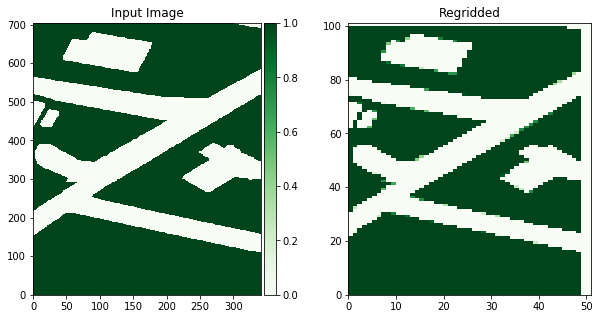

In [10]:

fig= plt.figure(figsize = (10,5))
ax = fig.add_subplot(121)                       
plt.subplots_adjust(wspace = 0.3)
# plt.axis('off')
im = ax.pcolormesh(image.T, cmap = 'Greens')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)    
ax.set_title('Input Image')

ax = fig.add_subplot(122)

im = ax.pcolormesh(isveg.T, cmap = 'Greens')
divider = make_axes_locatable(ax)
 
ax.set_title('Regridded')

print 'scaled image shape=' , image2.shape
print 'input  veg shape=' ,  isveg.shape
